<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

***
***
# 1. About the Dataset

<center><img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass**: The building class
* **MSZoning**: The general zoning classification
* **LotFrontage**: Linear feet of street connected to property
* **LotArea**: Lot size in square feet
* **Street**: Type of road access
* **Alley**: Type of alley access
* **LotShape**: General shape of property
* **LandContour**: Flatness of the property
* **Utilities**: Type of utilities available
* **LotConfig**: Lot configuration
* **LandSlope**: Slope of property
* **Neighborhood**: Physical locations within Ames city limits
* **Condition1**: Proximity to main road or railroad
* **Condition2**: Proximity to main road or railroad (if a second is present)
* **BldgType**: Type of dwelling
* **HouseStyle**: Style of dwelling
* **OverallQual**: Overall material and finish quality
* **OverallCond**: Overall condition rating
* **YearBuilt**: Original construction date
* **YearRemodAdd**: Remodel date
* **RoofStyle**: Type of roof
* **RoofMatl**: Roof material
* **Exterior1st**: Exterior covering on house
* **Exterior2nd**: Exterior covering on house (if more than one material)
* **MasVnrType**: Masonry veneer type
* **MasVnrArea**: Masonry veneer area in square feet
* **ExterQual**: Exterior material quality
* **ExterCond**: Present condition of the material on the exterior
* **Foundation**: Type of foundation
* **BsmtQual**: Height of the basement
* **BsmtCond**: General condition of the basement
* **BsmtExposure**: Walkout or garden level basement walls
* **BsmtFinType1**: Quality of basement finished area
* **BsmtFinSF1**: Type 1 finished square feet
* **BsmtFinType2**: Quality of second finished area (if present)
* **BsmtFinSF2**: Type 2 finished square feet
* **BsmtUnfSF**: Unfinished square feet of basement area
* **TotalBsmtSF**: Total square feet of basement area
* **Heating**: Type of heating
* **HeatingQC**: Heating quality and condition
* **CentralAir**: Central air conditioning
* **Electrical**: Electrical system
* **1stFlrSF**: First Floor square feet
* **2ndFlrSF**: Second floor square feet
* **LowQualFinSF**: Low quality finished square feet (all floors)
* **GrLivArea**: Above grade (ground) living area square feet
* **BsmtFullBath**: Basement full bathrooms
* **BsmtHalfBath**: Basement half bathrooms
* **FullBath**: Full bathrooms above grade
* **HalfBath**: Half baths above grade
* **Bedroom**: Number of bedrooms above basement level
* **Kitchen**: Number of kitchens
* **KitchenQual**: Kitchen quality
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **Functional**: Home functionality rating
* **Fireplaces**: Number of fireplaces
* **FireplaceQu**: Fireplace quality
* **GarageType**: Garage location
* **GarageYrBlt**: Year garage was built
* **GarageFinish**: Interior finish of the garage
* **GarageCars**: Size of garage in car capacity
* **GarageArea**: Size of garage in square feet
* **GarageQual**: Garage quality
* **GarageCond**: Garage condition
* **PavedDrive**: Paved driveway
* **WoodDeckSF**: Wood deck area in square feet
* **OpenPorchSF**: Open porch area in square feet
* **EnclosedPorch**: Enclosed porch area in square feet
* **3SsnPorch**: Three season porch area in square feet
* **ScreenPorch**: Screen porch area in square feet
* **PoolArea**: Pool area in square feet
* **PoolQC**: Pool quality
* **Fence**: Fence quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **MiscVal**: Value of miscellaneous feature
* **MoSold**: Month Sold
* **YrSold**: Year Sold
* **SaleType**: Type of sale
* **SaleCondition**: Condition of sale

***
***
# 2. Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import warnings
from collections import Counter
import plotly.express as px

import re
import time
import math
from datetime import datetime as dt

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)

plt.style.use('dark_background')


In [151]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


***
# 3. Defining Functions

In [4]:
def metrics(y, predictions):
    list_metrics=[]
    
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    
    list_metrics.append([mae.round(2),mse.round(2),rmse.round(2),r_squared.round(4)])
    
    print(f" Mean Absolute Error: {mae.round(2)} \n Mean Squared Error: {mse.round(2)} \n Root Mean Squared Error: {rmse.round(2)} \n R Squared: {r_squared.round(4)} ")
    
    return list_metrics

***
# 4. Exploratory Data Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [24]:
#Missing values percentage
pd.DataFrame(df.isnull().mean()).sort_values(by=0,ascending=False).head(25)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479


In [25]:
#Missing values percentage
pd.DataFrame(df.isna().mean()).sort_values(by=0,ascending=False).head(25)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479


In [26]:
#Is there any duplicated values?

df.duplicated().mean()

0.0

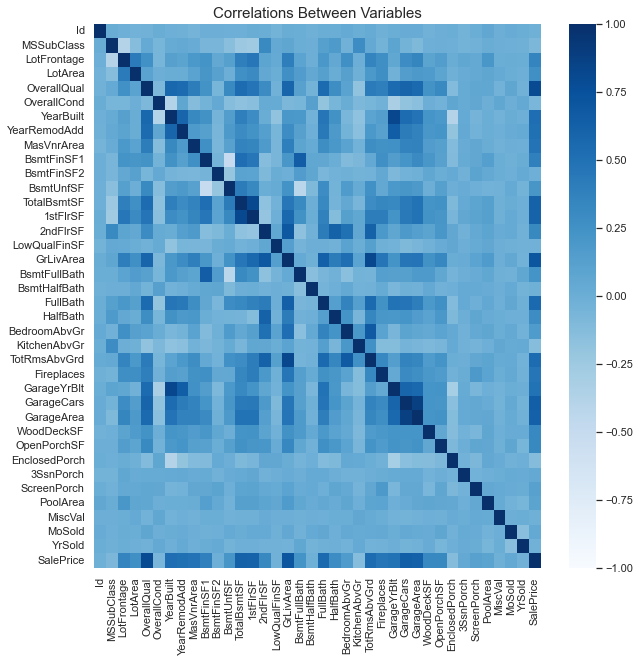

In [27]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Correlations Between Variables", size=15)
sns.heatmap(corrmat,cmap='Blues', vmax=1,vmin=-1, annot=False,annot_kws={"size": 7});

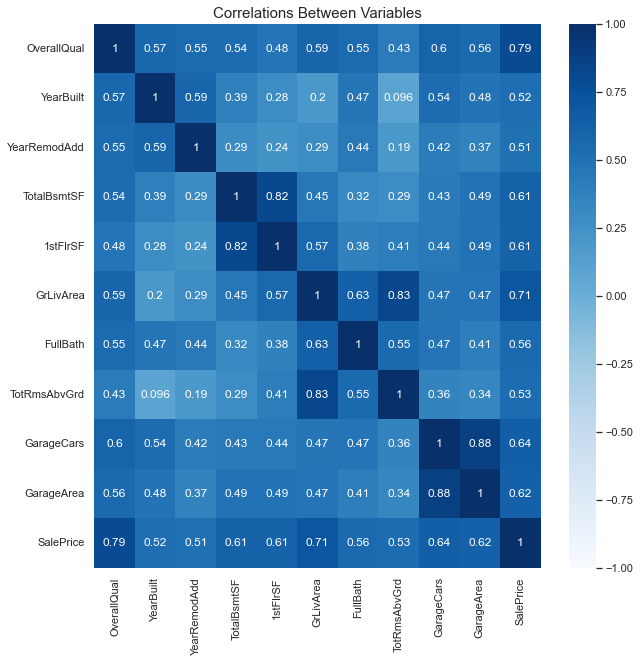

In [28]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
plt.title("Correlations Between Variables", size=15)
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",vmax=1,vmin=-1)

In [31]:
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = list(top_corr_features) + cat_cols

df_new = df[important_cols]
df_new

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [32]:
df_new.isna().mean()

OverallQual      0.0
YearBuilt        0.0
YearRemodAdd     0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
GrLivArea        0.0
FullBath         0.0
TotRmsAbvGrd     0.0
GarageCars       0.0
GarageArea       0.0
SalePrice        0.0
MSZoning         0.0
Utilities        0.0
BldgType         0.0
Heating          0.0
KitchenQual      0.0
SaleCondition    0.0
LandSlope        0.0
dtype: float64

***
***
# 4. Preprocessing

In [37]:
df_new

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [38]:
#Let's divede the columns in number and string columns

str_list=[]
num_list=[]

for i in df_new.columns:
    
    if (type(df_new[i][0]) == np.int64) or (type(df_new[i][0]) == np.float64):
        
        num_list.append(i)
        
    elif (type(df_new[i][0]) == str):
        
        str_list.append(i)

    else:
        str_list.append(i)

In [39]:
num_list

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [40]:
str_list

['MSZoning',
 'Utilities',
 'BldgType',
 'Heating',
 'KitchenQual',
 'SaleCondition',
 'LandSlope']

In [41]:
df0 = df_new[str_list]
df0

,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...
1455,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [42]:
df2 = pd.get_dummies(df_new, columns=str_list,drop_first=False)
df2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,1,0,1,0,0


In [43]:
X=df2.drop(columns=['SalePrice'])
y=df2['SalePrice']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.2)

print(f"Training dataset size { X_train.shape}")
print(f"Training dataset size { X_test.shape}")

Training dataset size (1168, 41)
Training dataset size (292, 41)


In [45]:
num_list_new =num_list.copy() 
num_list_new.remove('SalePrice')

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns = num_list_new

X_train[columns] = scaler.fit_transform(X_train[columns])
X_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
133,0.777778,0.934783,0.866667,0.207365,0.213889,0.164873,0.666667,0.272727,0.50,0.332158,...,0,0,0,0,0,1,0,1,0,0
290,0.777778,0.971014,0.933333,0.176596,0.163657,0.284589,0.666667,0.454545,0.50,0.483075,...,0,0,0,0,0,0,1,1,0,0
24,0.444444,0.695652,0.850000,0.173486,0.159259,0.119523,0.333333,0.272727,0.25,0.190409,...,0,0,0,0,0,1,0,1,0,0
1093,0.444444,0.673913,0.800000,0.141408,0.191667,0.146426,0.333333,0.272727,0.50,0.623413,...,0,0,0,0,0,1,0,1,0,0
1288,0.777778,0.927536,0.833333,0.245663,0.297917,0.234627,0.666667,0.181818,0.50,0.351904,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.666667,0.963768,0.916667,0.119149,0.082407,0.195619,0.666667,0.363636,0.50,0.289140,...,0,0,0,0,0,1,0,1,0,0
53,0.888889,0.789855,0.616667,0.301473,0.340278,0.269792,0.000000,0.181818,0.75,0.630465,...,0,0,0,0,0,1,0,1,0,0
350,0.888889,0.978261,0.950000,0.305892,0.346528,0.274981,0.666667,0.272727,0.50,0.435120,...,0,0,0,0,0,0,1,1,0,0
79,0.444444,0.275362,0.516667,0.072013,0.071759,0.152191,0.333333,0.181818,0.50,0.310296,...,1,0,0,0,0,1,0,1,0,0


In [47]:
X_test[columns] = scaler.transform(X_test[columns])
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
1436,0.333333,0.717391,0.350000,0.141408,0.113889,0.081860,0.333333,0.181818,0.50,0.372355,...,1,0,0,0,0,1,0,1,0,0
57,0.666667,0.956522,0.900000,0.140753,0.112963,0.246349,0.666667,0.363636,0.50,0.398449,...,0,0,0,0,0,1,0,1,0,0
780,0.666667,0.891304,0.766667,0.202455,0.203935,0.156610,0.666667,0.272727,0.50,0.283498,...,1,0,0,0,0,1,0,1,0,0
382,0.666667,0.971014,0.933333,0.153682,0.131250,0.261145,0.666667,0.454545,0.50,0.450635,...,0,0,0,0,0,1,0,1,0,0
1170,0.555556,0.760870,0.450000,0.179378,0.172685,0.130669,0.333333,0.272727,0.25,0.252468,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,0.555556,0.347826,0.000000,0.247136,0.280556,0.452344,0.666667,0.454545,0.50,0.366714,...,1,0,0,0,0,1,0,1,0,0
1033,0.666667,0.942029,0.866667,0.270704,0.296759,0.233666,0.666667,0.272727,0.75,0.634697,...,0,0,0,0,0,1,0,1,0,0
977,0.666667,0.971014,0.950000,0.203110,0.201157,0.154304,0.333333,0.090909,0.50,0.401269,...,0,0,0,0,0,0,1,1,0,0
661,0.777778,0.884058,0.916667,0.266612,0.304167,0.386241,0.666667,0.454545,0.75,0.501410,...,0,0,0,0,0,1,0,1,0,0


****
****
# 5. Algorithms

## Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train,y_train)

pred_linear = linear.predict(X_test)

print(f" Train score  {linear.score(X_train,y_train)} ")
      
print(f" Test score  {linear.score(X_test,y_test)} ")

 Train score  0.7733544741129817 
 Test score  0.8476086246676238 


In [82]:
linear_metrics = metrics(y_test,pred_linear)

 Mean Absolute Error: 21983.44 
 Mean Squared Error: 979737893.46 
 Root Mean Squared Error: 31300.77 
 R Squared: 0.8476 


In [83]:
df_linear = pd.DataFrame(linear_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Linear Regression'])
df_linear

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Linear Regression,21983.44,9.797379e+08,31300.77,0.8476


***
***

## Ridge

In [87]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)

pred_ridge = ridge.predict(X_test)

print(f" Train score  {ridge.score(X_train,y_train)} ")
      
print(f" Test score  {ridge.score(X_test,y_test)} ")

 Train score  0.7992911579299191 
 Test score  0.8438207959052674 


In [88]:
ridge_metrics = metrics(y_test,pred_ridge)

 Mean Absolute Error: 21326.67 
 Mean Squared Error: 1004090186.13 
 Root Mean Squared Error: 31687.38 
 R Squared: 0.8438 


In [89]:
df_ridge = pd.DataFrame(ridge_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Ridge Regression'])
df_ridge

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Ridge Regression,21326.67,1.004090e+09,31687.38,0.8438


In [113]:
start = time.process_time()
real_time = dt.now()

from sklearn.model_selection import RandomizedSearchCV


model_ridge_rand = Ridge()

params_ridge_rand = {
                             'alpha': np.linspace(0.00001,1000,100),
                            'max_iter':[1000,2000,3000,4000,5000,7000,9000,11000,13000,15000,17000,20000],
                              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
                                
                }




random_search_ridge_rand = RandomizedSearchCV(model_ridge_rand,param_distributions=params_ridge_rand,n_iter=1000,random_state=100,n_jobs=-1)

random_search_ridge_rand.fit(X_train,y_train)
print(random_search_ridge_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'solver': 'lsqr', 'max_iter': 11000, 'alpha': 1e-05}

 The Process time taken by the model was 0.03 minutes

 The Real time taken by the model was 0.07 minutes


In [115]:
start = time.process_time()
real_time = dt.now()

best_ridge = Ridge(**random_search_ridge_rand.best_params_)
best_ridge.fit(X_train,y_train)

pred_test = best_ridge.predict(X_test)

print(f" Train score  {best_ridge.score(X_train,y_train)} ")
      
print(f" Test score  {best_ridge.score(X_test,y_test)} ")



print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

 Train score  0.8012173221265483 
 Test score  0.8470993994233296 

 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


In [116]:
best_ridge__metrics = metrics(y_test,pred_test)

 Mean Absolute Error: 21200.91 
 Mean Squared Error: 983011748.47 
 Root Mean Squared Error: 31353.02 
 R Squared: 0.8471 


In [117]:
df_best_ridge = pd.DataFrame(best_ridge__metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Best Ridge Regression'])
df_best_ridge

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Best Ridge Regression,21200.91,9.830117e+08,31353.02,0.8471


In [119]:
pd.concat([df_ridge,df_best_ridge])

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Ridge Regression,21326.67,1.004090e+09,31687.38,0.8438
Best Ridge Regression,21200.91,9.830117e+08,31353.02,0.8471


***
***
## Lasso Regression

In [120]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)

pred_lasso = lasso.predict(X_test)

print(f" Train score  {lasso.score(X_train,y_train)} ")
      
print(f" Test score  {lasso.score(X_test,y_test)} ")

 Train score  0.8012165064612619 
 Test score  0.8471181360161724 


In [121]:
lasso_metrics = metrics(y_test,pred_lasso)

 Mean Absolute Error: 21197.83 
 Mean Squared Error: 982891289.23 
 Root Mean Squared Error: 31351.1 
 R Squared: 0.8471 


In [122]:
df_lasso = pd.DataFrame(lasso_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Lasso Regression'])
df_lasso

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Lasso Regression,21197.83,9.828913e+08,31351.1,0.8471


In [167]:
start = time.process_time()
real_time = dt.now()

from sklearn.model_selection import RandomizedSearchCV


model_lasso_rand = Lasso()

params_lasso_rand = {
                             'alpha': np.linspace(0.00001,10000,1000),
                            #'max_iter':list(range(10000,100000,1000))
                            'max_iter':[2000,5000,10000,12000,15000,20000,25000,30000]
                           
                                
                }




random_search_lasso_rand = RandomizedSearchCV(model_lasso_rand,param_distributions=params_lasso_rand,n_iter=10,random_state=100,n_jobs=-1)

random_search_lasso_rand.fit(X_train,y_train)
print(random_search_lasso_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'max_iter': 30000, 'alpha': 90.09009999999999}

 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


In [168]:
start = time.process_time()
real_time = dt.now()

best_lasso = Lasso(**random_search_lasso_rand.best_params_)
best_lasso.fit(X_train,y_train)

pred_test = best_lasso.predict(X_test)

print(f" Train score  {best_lasso.score(X_train,y_train)} ")
      
print(f" Test score  {best_lasso.score(X_test,y_test)} ")



print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

 Train score  0.7990412877508157 
 Test score  0.8466667401585329 

 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


In [164]:
best_lasso_metrics = metrics(y_test,pred_test)

 Mean Absolute Error: 21265.58 
 Mean Squared Error: 1006442888.3 
 Root Mean Squared Error: 31724.48 
 R Squared: 0.8435 


In [165]:
df_best_lasso = pd.DataFrame(best_lasso_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Best Lasso Regression'])
df_best_lasso

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Best Lasso Regression,21265.58,1.006443e+09,31724.48,0.8435


In [166]:
pd.concat([df_lasso,df_best_lasso])

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Lasso Regression,21197.83,9.828913e+08,31351.10,0.8471
Best Lasso Regression,21265.58,1.006443e+09,31724.48,0.8435


***
***
## SGDRegressor

In [169]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X_train,y_train)

pred_sgd = sgd.predict(X_test)

print(f" Train score  {sgd.score(X_train,y_train)} ")
      
print(f" Test score  {sgd.score(X_test,y_test)} ")

 Train score  0.7834225599151516 
 Test score  0.8269270181130106 


In [170]:
sgd_metrics = metrics(y_test,pred_sgd)

 Mean Absolute Error: 22609.52 
 Mean Squared Error: 1112701806.9 
 Root Mean Squared Error: 33357.19 
 R Squared: 0.8269 


In [171]:
df_sgd = pd.DataFrame(sgd_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['SGD Regression'])
df_sgd

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
SGD Regression,22609.52,1.112702e+09,33357.19,0.8269


In [188]:
start = time.process_time()
real_time = dt.now()

from sklearn.model_selection import RandomizedSearchCV


model_xgb_rand = SGDRegressor()

params_xgb_rand = {
                             'penalty':['elasticnet'],
                            'max_iter':[1000,2000,3000,4000,5000,7000,9000,12000],
                            'l1_ratio' : np.linspace(0,1,1000),
                            'alpha': np.linspace(0.00001,1000,1000)
                }




random_search_xgb_rand = RandomizedSearchCV(model_xgb_rand,param_distributions=params_xgb_rand,n_iter=10000,random_state=100,n_jobs=-1)

random_search_xgb_rand.fit(X_train,y_train)
print(random_search_xgb_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'penalty': 'elasticnet', 'max_iter': 5000, 'l1_ratio': 0.9139139139139139, 'alpha': 1e-05}

 The Process time taken by the model was 0.28 minutes

 The Real time taken by the model was 0.93 minutes


In [189]:
start = time.process_time()
real_time = dt.now()

best_sgd = SGDRegressor(**random_search_xgb_rand.best_params_)
best_sgd.fit(X_train,y_train)

pred_test = best_sgd.predict(X_test)

print(f" Train score  {best_sgd.score(X_train,y_train)} ")
      
print(f" Test score  {best_sgd.score(X_test,y_test)} ")



print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

 Train score  0.7883299367010002 
 Test score  0.8344348767355856 

 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


In [190]:
best_sgd_metrics = metrics(y_test,pred_test)

 Mean Absolute Error: 22318.66 
 Mean Squared Error: 1064433106.82 
 Root Mean Squared Error: 32625.65 
 R Squared: 0.8344 


In [191]:
df_best_sgd = pd.DataFrame(best_sgd_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Best SGD Regression'])
df_best_sgd

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Best SGD Regression,22318.66,1.064433e+09,32625.65,0.8344


In [192]:
pd.concat([df_sgd,df_best_sgd])

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
SGD Regression,22609.52,1.112702e+09,33357.19,0.8269
Best SGD Regression,22318.66,1.064433e+09,32625.65,0.8344


***
***
## Random Forest Regressor


In [201]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

pred_rfr = rfr.predict(X_test)


print(f" Train score  {rfr.score(X_train,y_train)} ")
      
print(f" Test score  {rfr.score(X_test,y_test)} ")

 Train score  0.9735891959355842 
 Test score  0.8830997897901778 


In [202]:
rfr_metrics = metrics(y_test,pred_rfr)

 Mean Absolute Error: 18141.27 
 Mean Squared Error: 751561992.57 
 Root Mean Squared Error: 27414.63 
 R Squared: 0.8831 


In [203]:
df_rfr = pd.DataFrame(rfr_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Random Forest Regressor'])
df_rfr

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Random Forest Regressor,18141.27,7.515620e+08,27414.63,0.8831


In [204]:
start = time.process_time()
real_time = dt.now()

from sklearn.model_selection import RandomizedSearchCV

model_for_rand = RandomForestRegressor()

params_for_rand = {     'n_estimators' : [100,200,300,400,500,600,700,800,1000],
                        'criterion' : ['squared_error','absolute_error','friedman_mse','poisson'],
                        'max_depth':[2,4,6,8,10,12,14,16,18,20,22,24],
                        'random_state':[100],
                        'max_features':['sqrt','log2'],
                        
                  }

#skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

#random_search_for_rand = RandomizedSearchCV(model_for_rand, param_distributions=params_for_rand,cv=skf, n_iter=100,scoring='f1_macro')
random_search_for_rand = RandomizedSearchCV(model_for_rand, param_distributions=params_for_rand, n_iter=30,scoring='f1_macro')

random_search_for_rand.fit(X_train,y_train)
print(random_search_for_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'random_state': 100, 'n_estimators': 200, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'friedman_mse'}

 The Process time taken by the model was 3.23 minutes

 The Real time taken by the model was 3.28 minutes


In [205]:
start = time.process_time()
real_time = dt.now()

best_forest = RandomForestRegressor(**random_search_for_rand.best_params_)
best_forest.fit(X_train,y_train)

pred_test = best_forest.predict(X_test)

print(f" Train score  {best_forest.score(X_train,y_train)} ")
      
print(f" Test score  {best_forest.score(X_test,y_test)} ")



print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

 Train score  0.9743773063994423 
 Test score  0.874674839892629 

 The Process time taken by the model was 0.01 minutes

 The Real time taken by the model was 0.0 minutes


In [206]:
best_rfr_metrics = metrics(y_test,pred_test)

 Mean Absolute Error: 18046.09 
 Mean Squared Error: 805726755.16 
 Root Mean Squared Error: 28385.33 
 R Squared: 0.8747 


In [207]:
df_best_rfr = pd.DataFrame(best_rfr_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Best Random Forest Regressor'])
df_best_rfr

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Best Random Forest Regressor,18046.09,8.057268e+08,28385.33,0.8747


In [208]:
pd.concat([df_rfr,df_best_rfr])

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Random Forest Regressor,18141.27,7.515620e+08,27414.63,0.8831
Best Random Forest Regressor,18046.09,8.057268e+08,28385.33,0.8747


***
***
## XGBoosting Regressor

In [209]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

pred_xgb = xgb.predict(X_test)

print(f" Train score  {xgb.score(X_train,y_train)} ")
      
print(f" Test score  {xgb.score(X_test,y_test)} ")

 Train score  0.9985642300633357 
 Test score  0.8812501652308066 


In [210]:
xgb_metrics = metrics(y_test,pred_xgb)

 Mean Absolute Error: 17980.5 
 Mean Squared Error: 763453395.65 
 Root Mean Squared Error: 27630.66 
 R Squared: 0.8813 


In [211]:
df_xgb = pd.DataFrame(xgb_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['XBG'])
df_xgb

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
XBG,17980.5,7.634534e+08,27630.66,0.8813


In [212]:
start = time.process_time()
real_time = dt.now()

from sklearn.model_selection import RandomizedSearchCV


model_xgb_rand = XGBRegressor()

params_xgb_rand = {
                             'n_estimators':[100,200,300,400,500],
                            'max_depth':[1,2,3,4,5,6,7,8,9,10],
                            'min_child_weight':[1,2,3,4,5,6,7,8,9,10],
                            'gamma':[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                            'learning_rate':[0.001,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                            'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                            'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                            
                                   
}

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

random_search_xgb_rand = RandomizedSearchCV(model_xgb_rand,param_distributions=params_xgb_rand,n_iter=1000,random_state=100,cv=skf,n_jobs=-1)

random_search_xgb_rand.fit(X_train,y_train)
print(random_search_xgb_rand.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.3}

 The Process time taken by the model was 0.23 minutes

 The Real time taken by the model was 4.15 minutes


In [213]:
start = time.process_time()
real_time = dt.now()

best_xgb = XGBRegressor(**random_search_xgb_rand.best_params_)
best_xgb.fit(X_train,y_train)

pred_test = best_xgb.predict(X_test)

print(f" Train score  {best_xgb.score(X_train,y_train)} ")
      
print(f" Test score  {best_xgb.score(X_test,y_test)} ")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

 Train score  0.9536819138315192 
 Test score  0.8920960202394076 

 The Process time taken by the model was 0.02 minutes

 The Real time taken by the model was 0.0 minutes


In [214]:
best_xgb_metrics = metrics(y_test,pred_test)

 Mean Absolute Error: 17117.04 
 Mean Squared Error: 693724415.81 
 Root Mean Squared Error: 26338.65 
 R Squared: 0.8921 


In [218]:
df_best_xgb = pd.DataFrame(best_xgb_metrics,columns=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared'],index=['Best XBG Regressor'])
df_best_xgb

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Best XBG Regressor,17117.04,6.937244e+08,26338.65,0.8921


In [219]:
pd.concat([df_xgb,df_best_xgb])

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
XBG,17980.50,7.634534e+08,27630.66,0.8813
Best XBG Regressor,17117.04,6.937244e+08,26338.65,0.8921


***
***
# 6. Conclusions

In [233]:
best_algorithms = pd.concat([df_linear,df_best_ridge,df_best_lasso,df_best_sgd,df_best_rfr,df_best_xgb])
best_algorithms.reset_index(inplace=True)
best_algorithms.rename(columns={'index':'Model'},inplace=True)
best_algorithms.sort_values(by='R Squared',ascending=False)

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
5,Best XBG Regressor,17117.04,6.937244e+08,26338.65,0.8921
4,Best Random Forest Regressor,18046.09,8.057268e+08,28385.33,0.8747
0,Linear Regression,21983.44,9.797379e+08,31300.77,0.8476
1,Best Ridge Regression,21200.91,9.830117e+08,31353.02,0.8471
2,Best Lasso Regression,21265.58,1.006443e+09,31724.48,0.8435
3,Best SGD Regression,22318.66,1.064433e+09,32625.65,0.8344


**The best algorithms are Random Forest Regressor and XGBoost Regressor**

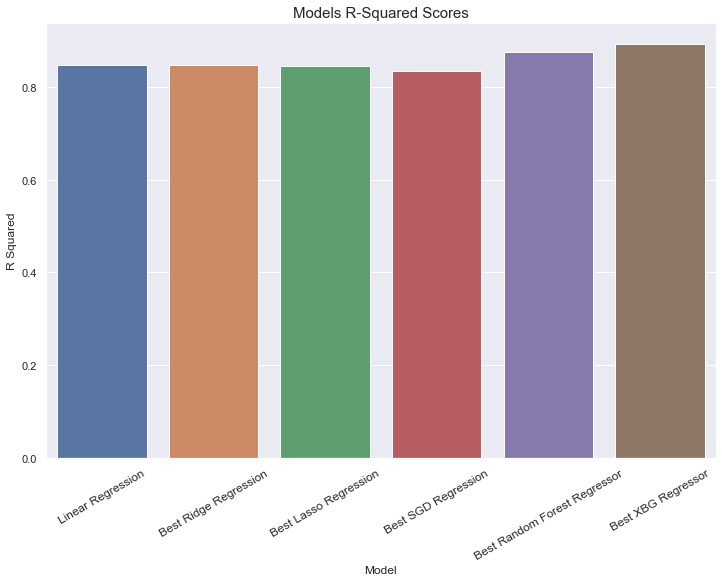

In [237]:
plt.figure(figsize=(12,8))
sns.barplot(x=best_algorithms["Model"], y=best_algorithms["R Squared"])
plt.title("Models R-Squared Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()